In [1]:
### in this cell we import necessary libraries for the demo
import numpy as np                  # a fundamental numerical linear algebra library
import matplotlib.pyplot as plt     # a basic plotting library
import pandas as pd                 # a basic data handling library
import sys
sys.path.append('utils')

# this line is required in order to plot in a jupyter notebook itself
%matplotlib inline       

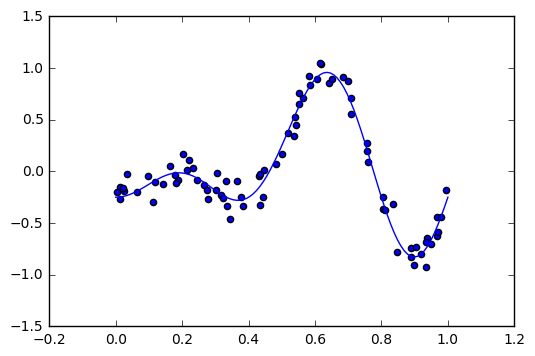

In [47]:
# make underlying function
x = np.linspace(0,1,100)
x.shape = (len(x),1)
y = x*np.sin(4*np.pi*x) + x*np.sin(np.pi*x) +1
y.shape = (len(y),1)
z = np.zeros((100,1))
z.shape = (len(z),1)
f = np.asarray([max(0,s)-1.25 for s in y])
f.shape = (len(f),1)
plt.plot(x,f)

# save true function
v = np.concatenate((x,f),axis = 1)
v = pd.DataFrame(v)
v.to_csv('regr_nonlinear_func.csv',header = None, index = False)

# make the dataset
x = np.random.rand(80)
x.shape = (len(x),1)
y = x*np.sin(4*np.pi*x) + x*np.sin(np.pi*x) +1
y.shape = (len(y),1)
z = np.zeros((100,1))
z.shape = (len(z),1)
f = np.asarray([max(0,s)-1.25 + 0.1*np.random.randn(1) for s in y])
f.shape = (len(f),1)
plt.scatter(x,f)

# save dataset
v = np.concatenate((x,f),axis = 1)
v = pd.DataFrame(v)
v.to_csv('regr_nonlinear_data.csv',header = None, index = False)

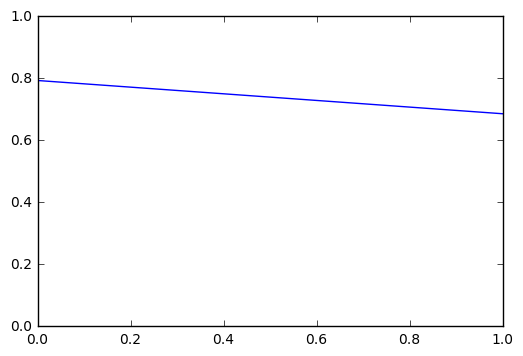

In [33]:
## Multiclass dataset maker

# create first boundary
x = np.linspace(0,1,100)
b1 = 2*np.random.rand(1) 
m1 = np.random.randn(1)
y1 = m1*x + b1

# create second boundary
b2 = 2*np.random.rand(1)
m2 = np.random.randn(1)
y2 = m2*x + b2

# create datapoints
num_pts = 50
s = np.random.rand(num_pts)
t = np.random.rand(num_pts)

# check where the points lie
pt_vals_1 = t - m1*s - b1
pt_vals_2 = t - m2*s - b2

# plot all
plt.plot(x,y1)
plt.plot(x,y2)

plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

In [34]:
pt_vals_1

array([-0.49832581,  0.25894601, -0.33802173, -0.50537026, -0.52213068,
       -0.5522242 , -0.51870892, -0.43480299, -0.12821581, -0.51659278,
       -0.5344729 , -0.35644949, -0.12019736, -0.7326604 , -0.3931514 ,
       -0.25386102, -0.48454385, -0.20785321,  0.00614792, -0.15312043,
        0.19727904, -0.59687057, -0.65093961, -0.45966908, -0.48974749,
        0.12254547, -0.33968724, -0.50664468, -0.02395578, -0.54773002,
       -0.32516311,  0.21928518, -0.59260105, -0.17144876, -0.10474664,
       -0.33478629,  0.15261505, -0.28514353, -0.67050042, -0.05655463,
       -0.05415663, -0.06846609, -0.51095125, -0.33794527, -0.65882374,
        0.17912057,  0.16278512, -0.39029924, -0.69519307, -0.40434496])

In [25]:
# function - plot data with underlying target function generated in the previous Python cell
def plot_data(data,labels,num_seps):    
    colors = ['salmon','cornflowerblue','lime','bisque','mediumaquamarine','b','m','g']
    classes = np.unique(labels)
    if len(classes) > len(colors):
        print 'add colors to color list, currently not enough colors loaded to show all classes generated'
        return
    
    # plot data 
    fig = plt.figure(figsize = (4,4))
    
    for num in classes:
        inds = np.argwhere(labels == num)
        inds = [s[0] for s in inds]
        plt.scatter(data[inds,0],data[inds,1],color = colors[int(num-1)],linewidth = 1,marker = 'o',edgecolor = 'k',s = 50)
    
    # plot separators
    for i in range(len(seps)):
        plt.plot(seps[i][:,0],seps[i][:,1],'--k',linewidth = 3)

    # clean up plot
    plt.yticks([],[])
    plt.xlim([-2.1,2.1])
    plt.ylim([-2.1,2.1])
    plt.axis('off') 

# make a toy circle dataset
def make_line_classification_dataset(num_pts,num_seps):
    '''
    This function generates a random line dataset with N classes. 
    You can run this a couple times to get a distribution you like visually.  
    You can also adjust the num_pts parameter to change the total number of points in the dataset.
    '''

    # generate points
    data_x = 4*np.random.rand(num_pts) - 2
    data_y = 4*np.random.rand(num_pts) - 2
    data_x.shape = (len(data_x),1)
    data_y.shape = (len(data_y),1)
    data = np.concatenate((data_x,data_y),axis = 1)

    # make separators
    x_f = 4*np.linspace(0,1,100) - 2
    x_f.shape = (len(x_f),1)
    # loop over and assign labels
    labels = []
    seps = []
    for n in range(num_seps):
        m,b = np.random.randn(2,1)
        y_f = m*x_f + b
        
        # make labels and flip a few to show some misclassifications
        one_labels = np.sign(data_y - (m*data_x + b))
        one_labels = [int(v[0]) for v in one_labels]
        labels.append(one_labels)
        
        sep = np.concatenate((x_f,y_f),axis = 1)
        seps.append(sep)
        
    # determine true labels based on individual classifier labels for all points
    labels = np.asarray(labels)
    unique_vals = np.vstack({tuple(row) for row in labels.T})

    new_labels = np.zeros((len(data)))
    for i in range(len(unique_vals)):
        val = unique_vals[i]
        yo = np.argwhere((labels.T == val).all(axis=1))
        yo = [v[0] for v in yo]
        new_labels[yo] = int(i+1)

    # return datapoints and labels for further 
    labels = new_labels
    return data,labels,seps

# save multiclass dataset
def save_data(data,labels,seps,data_csvname,seps_csvname):
    # save data and labels
    data = np.asarray(data)
    data.shape = (len(data),2)
    labels = np.asarray(labels)
    labels.shape = (len(labels),1)
    new_data = np.concatenate((data,labels),axis = 1)
    new_data = pd.DataFrame(new_data)
    new_data.to_csv(data_csvname,header = None, index = False)
    
    # save separators
    new_seps = []
    for i in range(np.shape(seps)[0]):
        new_seps.append(seps[i][:,0])
        new_seps.append(seps[i][:,1])
    new_seps = np.asarray(new_seps).T
    new_seps = pd.DataFrame(new_seps)
    new_seps.to_csv(seps_csvname,header = None, index = False)

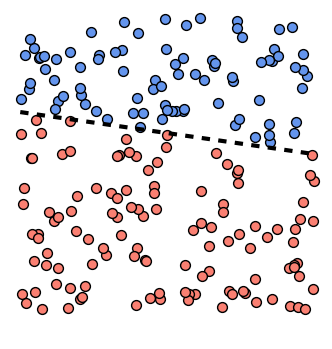

In [26]:
# generate data, labels, and true linear separators
data,labels,seps = make_line_classification_dataset(num_pts = 200,num_seps = 1)

# plot data and separators
plot_data(data,labels,seps)

# save data and separators
data_csvname = 'linear_multiclass_dataset.csv'
seps_csvname = 'linear_multiclass_separators.csv'
save_data(data,labels,seps,data_csvname,seps_csvname)

In [24]:
np.shape(seps)[0]

1

In [328]:
# function - plot data with underlying target function generated in the previous Python cell
def plot_data(data,labels,num_seps):    
    colors = ['salmon','cornflowerblue','lime','bisque','mediumaquamarine','b','m','g']
    classes = np.unique(labels)
    if len(classes) > len(colors):
        print 'add colors to color list, currently not enough colors loaded to show all classes generated'
        return
    
    # plot data 
    fig = plt.figure(figsize = (4,4))
    
    for num in classes:
        inds = np.argwhere(labels == num)
        inds = [s[0] for s in inds]
        plt.scatter(data[inds,0],data[inds,1],color = colors[int(num-1)],linewidth = 1,marker = 'o',edgecolor = 'k',s = 50)
    
    # plot separators
    for i in range(len(seps)):
        plt.plot(seps[i][:,0],seps[i][:,1],'--k',linewidth = 3)

    # clean up plot
    plt.yticks([],[])
    plt.xlim([-2.1,2.1])
    plt.ylim([-2.1,2.1])
    plt.axis('off') 

# make a toy nonlinear dataset
def make_nonlinear_classification_dataset(num_pts,num_seps):
    '''
    This function generates a random line dataset with N classes. 
    You can run this a couple times to get a distribution you like visually.  
    You can also adjust the num_pts parameter to change the total number of points in the dataset.
    '''

    # generate points
    data_x = 4*np.random.rand(num_pts) - 2
    data_y = 4*np.random.rand(num_pts) - 2
    data_x.shape = (len(data_x),1)
    data_y.shape = (len(data_y),1)
    data = np.concatenate((data_x,data_y),axis = 1)

    # make separators
    x_f = 4*np.linspace(0,1,100) - 2
    x_f.shape = (len(x_f),1)

    # loop over and assign labels
    labels = []
    seps = []
    for n in range(num_seps):       
    
        deg = np.random.randint(2,7)
        b = np.random.randn(1)
        m = np.random.randn(1)
        y_f = m*x_f**deg + b 
        
        # make labels and flip a few to show some misclassifications
        temp = data_y - (m*data_x**deg + b)
        one_labels = np.sign(temp)
        one_labels = [int(v[0]) for v in one_labels]
        labels.append(one_labels)
        
        sep = np.concatenate((x_f,y_f),axis = 1)
        seps.append(sep)
        
    # determine true labels based on individual classifier labels for all points
    labels = np.asarray(labels)
    unique_vals = np.vstack({tuple(row) for row in labels.T})

    new_labels = np.zeros((len(data)))
    for i in range(len(unique_vals)):
        val = unique_vals[i]
        yo = np.argwhere((labels.T == val).all(axis=1))
        yo = [v[0] for v in yo]
        new_labels[yo] = int(i+1)

    # return datapoints and labels for further 
    labels = new_labels
    return data,labels,seps


# save multiclass dataset
def save_data(data,labels,seps,data_csvname,seps_csvname):
    # save data and labels
    data = np.asarray(data)
    data.shape = (len(data),2)
    labels = np.asarray(labels)
    labels.shape = (len(labels),1)
    new_data = np.concatenate((data,labels),axis = 1)
    new_data = pd.DataFrame(new_data)
    new_data.to_csv(data_csvname,header = None, index = False)
    
    # save separators
    new_seps = []
    for i in range(np.shape(seps)[2]):
        new_seps.append(seps[i][:,0])
        new_seps.append(seps[i][:,1])
    new_seps = np.asarray(new_seps).T
    new_seps = pd.DataFrame(new_seps)
    new_seps.to_csv(seps_csvname,header = None, index = False)

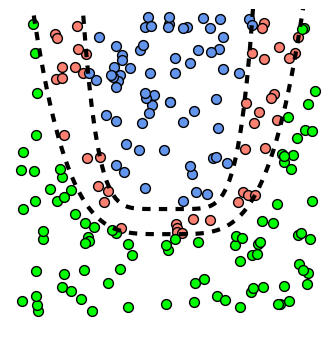

In [351]:
# generate data, labels, and true linear separators
data,labels,seps = make_nonlinear_classification_dataset(num_pts = 200,num_seps = 2)

# plot data and separators
plot_data(data,labels,seps)


# save data and separators
data_csvname = 'nonlinear_multiclass_dataset.csv'
seps_csvname = 'nonlinear_multiclass_separators.csv'
save_data(data,labels,seps,data_csvname,seps_csvname)